In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
from sklearn.naive_bayes import MultinomialNB
import seaborn as sn
import matplotlib.pyplot as plt

/Users/Hooman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X_train = pd.read_csv('../data/interim/X-train.csv', usecols = ['question_text'])
y_train = pd.read_csv('../data/interim/y-train.csv', usecols = ['target'])
X_test = pd.read_csv('../data/interim/X-test.csv', usecols = ['question_text'])
y_test = pd.read_csv('../data/interim/y-test.csv', usecols = ['target'])

In [3]:
X_train.head()

,question_text
0,Can I get pregnant by dry humping?
1,Can I divade project in different git submodul...
2,How can I donate bone marrow in UAE?
3,What are the best books about negative thinking?
4,Why does Texas have high property taxes?


In [4]:
y_train.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
np.mean(y_test)

target    0.061863
dtype: float64

In [6]:
#def removeExtraChars(qtext):
#    result = [re.sub(r'[^A-Za-z ]+', ' ', sentence) for sentence in qtext]
#    return result
#def removeStopWords(qtext):
#    # Remove stop words
#    result = []
#    for sentence in qtext:
#        words = sentence.split()
#        result.append(' '.join([w for w in words if w not in STOPWORDS]))
#    return result
#def preprocessText(df):
#    
#    # Remove extra characters
#    df['question_text'] = removeExtraChars(df['question_text'])
#    
#    # Lower case
#    df['question_text'] = [sentence.lower() for sentence in df['question_text']]
#    
#    # Remove stop words
#    df['question_text'] = removeStopWords(df['question_text'])
#    
#    return df
#class preprocessTextTransformer():
#    
#    def __init__(self, func):
#        self.func = func
#
#    def transform(self, input_df, **transform_params):
#        return self.func(input_df)
#
#    def fit(self, X, y=None, **fit_params):
#        return self
#pipeline = Pipeline([
#    ("preprocess", preprocessTextTransformer(preprocessText))
#])
#_ = pipeline.fit_transform(trainData)
#def tokenize(sentence):
#    tokens = [word for word in nltk.word_tokenize(sentence) if len(word)>1]
#    stemmer = PorterStemmer()
#    stems = [stemmer.stem(item) for item in tokens]
#    return stems
#def createDTM(qtext):
#    vectorizer = TfidfVectorizer(tokenizer = tokenize)
#    dtm = vectorizer.fit_transform(qtext)
#    result = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
#    return result

In [7]:
#pipeline = Pipeline([
#    ('vect', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
#])
#corpus = X_train['question_text'][2:4]
#pipe = pipeline.fit(corpus)
#print(pipe['vect'].transform(corpus).toarray())
#print(pipe['tfidf'].idf_)
#print(pipe.transform(corpus).shape)

In [8]:
# Simple case to check CountVectorizer() and TfidfTransformer()
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])
corpus = X_train['question_text'][2:4]
pipe = pipeline.fit(corpus)
print(pipe['vect'].transform(corpus).toarray())
print(pipe['tfidf'].idf_)
print(pipe.transform(corpus).shape)

[[0 0 0 1 0 1 1 1 1 1 0 0 0 1 0]
 [1 1 1 0 1 0 0 0 0 0 1 1 1 0 1]]
[1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511]
(2, 15)


In [9]:
def calculate_accuracy(true_y, predicted_y):
    print('Accuracy: ', np.mean(predicted_y==true_y))
    
def plot_confusion_matrix(true_y, predicted_y):
    df = pd.DataFrame(data = {'y_Actual': true_y,
                              'y_Predicted': predicted_y
                             }, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                                   rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()

Accuracy:  0.938137384007595


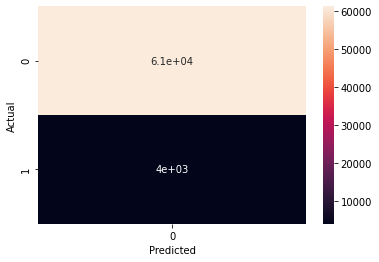

In [10]:
# Logistic regression
log_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english', lowercase=True, ngram_range=(2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='log')),
])
log_clf.fit(X_train['question_text'], y_train['target'])
log_predicted = log_clf.predict(X_test['question_text'])
calculate_accuracy(y_test['target'],log_predicted)
plot_confusion_matrix(y_test['target'],log_predicted)

Accuracy:  0.938168009065017


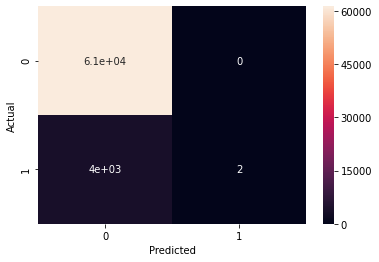

In [11]:
# SVM
svm_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english', lowercase=True, ngram_range=(2, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge')),
])
svm_clf.fit(X_train['question_text'], y_train['target'])
svm_predicted = svm_clf.predict(X_test['question_text'])
calculate_accuracy(y_test['target'],svm_predicted)
plot_confusion_matrix(y_test['target'],svm_predicted)

Accuracy:  0.9386733225124797


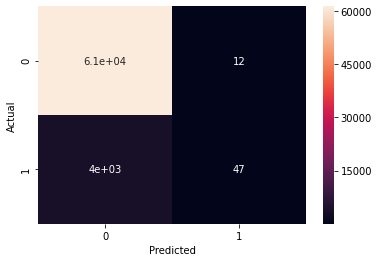

In [12]:
# Naive Bayes
naive_bayes_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
naive_bayes_clf.fit(X_train['question_text'], y_train['target'])
naive_bayes_predicted = naive_bayes_clf.predict(X_test['question_text'])
calculate_accuracy(y_test['target'],naive_bayes_predicted)
plot_confusion_matrix(y_test['target'],naive_bayes_predicted)

In [13]:
# Parameters for grid search
log_parameters = {
    'vect__stop_words': ('english',),
    'vect__lowercase': (True,),
    #'vect__max_df': (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((2, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__loss': ('log',),
    #'clf__penalty': ('l1','l2','elasticnet'),
    #'clf__alpha': (0.0001, 0.00001, 0.000001),
    #'clf__max_iter': (10, 50, 80),
}

log_grid_search = GridSearchCV(log_clf, log_parameters, cv=5, n_jobs=-1)

In [14]:
print("Performing grid search...")
print("pipeline:", [name for name, _ in log_clf.steps])
print("parameters:")
pprint(log_parameters)
t0 = time()
log_grid_search.fit(X_train['question_text'], y_train['target'])
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % log_grid_search.best_score_)
print("Best parameters set:")
log_best_parameters = log_grid_search.best_estimator_.get_params()
for param_name in sorted(inear_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__loss': ('log',),
 'vect__lowercase': (True,),
 'vect__ngram_range': (2, 2),
 'vect__stop_words': ('english',)}


TypeError: cannot unpack non-iterable int object